In [1]:
import cv2
import numpy as np
import lib.jpeg as jpg
import lib.evaluate as eval
import lib.utils as utl
import matplotlib.pyplot as plt

In [2]:
#usage example
ori_img = utl.open_image("../samples/parrot.bmp")

#creating qtables for luma and chroma for qualities 100, 50, 25 and 10
qtable_luma_100, qtable_chroma_100 = jpg.generate_qtables(quality_factor=100)
qtable_luma_50, qtable_chroma_50 = jpg.generate_qtables(quality_factor=50)
qtable_luma_25, qtable_chroma_25 = jpg.generate_qtables(quality_factor=25)
qtable_luma_10, qtable_chroma_10 = jpg.generate_qtables(quality_factor=10)
qtable_luma_5, qtable_chroma_5 = jpg.generate_qtables(quality_factor=5)

#encoding 
dct_img_100 = jpg.encode_image(ori_img, qtable_luma_100, qtable_chroma_100)
dct_img_50 = jpg.encode_image(ori_img, qtable_luma_50, qtable_chroma_50)
dct_img_25 = jpg.encode_image(ori_img, qtable_luma_25, qtable_chroma_25)
dct_img_10 = jpg.encode_image(ori_img, qtable_luma_10, qtable_chroma_10)
dct_img_5 = jpg.encode_image(ori_img, qtable_luma_5, qtable_chroma_5)

#decoding
dec_img_100 = jpg.decode_image(dct_img_100, qtable_luma_100, qtable_chroma_100)
dec_img_50 = jpg.decode_image(dct_img_50, qtable_luma_50, qtable_chroma_50)
dec_img_25 = jpg.decode_image(dct_img_25, qtable_luma_25, qtable_chroma_25)
dec_img_10 = jpg.decode_image(dct_img_10, qtable_luma_10, qtable_chroma_10)
dec_img_5 = jpg.decode_image(dct_img_5, qtable_luma_5, qtable_chroma_5)

In [3]:
print("100 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_100), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_100),
"PSNR:", eval.calc_psnr(ori_img, dec_img_100))

print("50 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_50), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_50),
"PSNR:", eval.calc_psnr(ori_img, dec_img_50))

print("25 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_25), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_25),
"PSNR:", eval.calc_psnr(ori_img, dec_img_25))

print("10 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_10), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_10),
"PSNR:", eval.calc_psnr(ori_img, dec_img_10))

print("5 - NRMSE:", eval.calc_nrmse(ori_img, dec_img_5), 
"SSIM:", eval.calc_ssim(ori_img, dec_img_5),
"PSNR:", eval.calc_psnr(ori_img, dec_img_5))

100 - NRMSE: 0.014085230096014695 SSIM: 0.9885913828055474 PSNR: 45.52761858141825
50 - NRMSE: 0.0852288042323018 SSIM: 0.9027451907630127 PSNR: 29.891169595615406
25 - NRMSE: 0.10829123603645183 SSIM: 0.8533615260761357 PSNR: 27.81103128591328
10 - NRMSE: 0.1488355864675401 SSIM: 0.7238362062914101 PSNR: 25.0487618398623
5 - NRMSE: 0.19375990299558504 SSIM: 0.6348157604074521 PSNR: 22.7576193340623


C:\Users\Busson_Windows\OneDrive\Documentos\git\Deep-JPEG-Decoder\src\lib\evaluate.py:5: UserWarning: DEPRECATED: skimage.measure.compare_nrmse has been moved to skimage.metrics.normalized_root_mse. It will be removed from skimage.measure in version 0.18.
  return compare_nrmse(img_ref, img_test)
C:\Users\Busson_Windows\OneDrive\Documentos\git\Deep-JPEG-Decoder\src\lib\evaluate.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  return compare_ssim(img_ref, img_test, multichannel=True)
C:\Users\Busson_Windows\OneDrive\Documentos\git\Deep-JPEG-Decoder\src\lib\evaluate.py:11: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  return compare_psnr(img_ref, img_test, data_range=255)


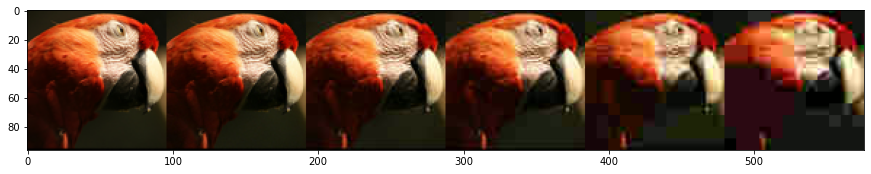

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([utl.cvt_bgr2rgb(ori_img), utl.cvt_bgr2rgb(dec_img_100), utl.cvt_bgr2rgb(dec_img_50), 
                      utl.cvt_bgr2rgb(dec_img_25), utl.cvt_bgr2rgb(dec_img_10), utl.cvt_bgr2rgb(dec_img_5)]))

CHANNEL TEST - NRMSE: 1.5571604185617591 SSIM: 0.02509135837373568 PSNR: 4.656230384293676


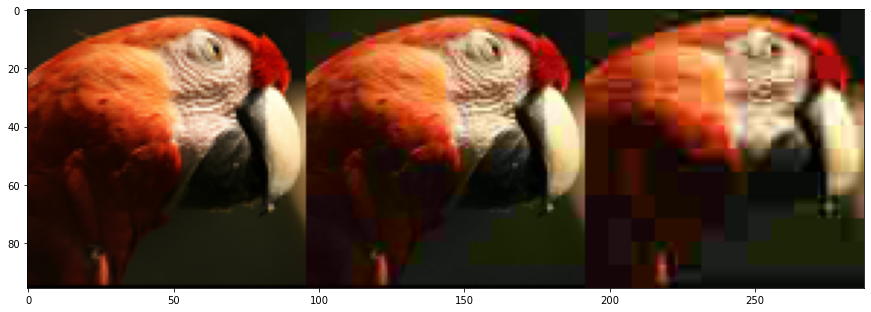

In [6]:
dct_img_test = jpg.encode_image(ori_img, qtable_luma_100, qtable_chroma_10)
dec_img_test = jpg.decode_image(dct_img_test, qtable_luma_100, qtable_chroma_10)

print("CHANNEL TEST - NRMSE:", eval.calc_nrmse(ori_img, dct_img_test), 
"SSIM:", eval.calc_ssim(ori_img, dct_img_test),
"PSNR:", eval.calc_psnr(ori_img, dct_img_test))

plt.figure(figsize=(15,15))
plt.imshow(np.hstack([utl.cvt_bgr2rgb(ori_img), utl.cvt_bgr2rgb(dec_img_test),utl.cvt_bgr2rgb(dec_img_10)]))